## Introduction à Pytorch 

https://ipython.readthedocs.io/en/stable/install/kernel_install.html#kernels-for-different-environments

# Pourquoi apprendre Pytorch ?

* Momentum dans la recherche
https://trends.google.com/trends/explore?date=all&geo=FR&q=pytorch,keras&hl=fr

* Pytorch est très performant

![Performance of frameworks](https://unfoldai.com/storage/2024/08/keras-pytorch-performance.jpg)





## Pourquoi PyTorch pourrait être préféré à Keras : Une comparaison

**PyTorch** et **Keras** sont deux bibliothèques Python populaires pour le deep learning, chacune avec ses forces et ses faiblesses. Choisir l'une ou l'autre dépend souvent des besoins spécifiques du projet. Voici quelques raisons pour lesquelles un développeur pourrait préférer PyTorch à Keras :

### 1. **Flexibilité et contrôle:**
* **Graphiques dynamiques:** PyTorch offre une grande flexibilité grâce à ses graphiques dynamiques, permettant de modifier le modèle à la volée. Cela est particulièrement utile pour la recherche et les modèles expérimentaux.
* **Bas niveau:** PyTorch est plus proche du matériel, ce qui donne un meilleur contrôle sur l'optimisation et le débogage.
* **Intégration avec d'autres outils:** PyTorch s'intègre facilement avec d'autres bibliothèques Python, ce qui le rend très polyvalent.

### 2. **Communauté et écosystème:**
* **Recherche active:** PyTorch est très populaire dans la communauté de recherche en apprentissage profond, ce qui signifie que de nouvelles fonctionnalités et améliorations sont souvent ajoutées.
* **Grand écosystème:** PyTorch dispose d'un écosystème riche et en constante évolution, avec de nombreux outils et bibliothèques complémentaires.

### 3. **Performances:**
* **Tensor opérations:** PyTorch offre des performances élevées grâce à son optimisation des opérations sur les tenseurs.
* **GPU accélération:** PyTorch est bien intégré avec les GPU, ce qui est essentiel pour les modèles de deep learning exigeants.

### 4. **Pythonic:**
* **Naturel:** PyTorch est conçu pour être très Pythonic, ce qui facilite l'apprentissage et l'utilisation pour les développeurs Python expérimentés.



# Un entrainement classique


## De quoi avons besoin pour entrainer un réseau de neurones ?

1. Des données labélisées
2. Un fonction de cout 
3. Un optimiseur
4. Des hyperparamètres


# Importation des librairies 

In [68]:
import torch
import torch.nn as nn



import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [73]:
# Créeons un dataset pour modéliser la fonction sinus

seed = 2024
np.random.seed(seed)
N = 1000
x= np.random.rand(N)
y = np.sin(2*np.pi*x)

#Generate training data
percentage_of_training_data = 0.3

dataset_indexes = np.arange(N)

train_indexes = np.random.choice(np.arange(N),size = int(percentage_of_training_data*N), replace = False)
#generate test data
val_indexes = list(set(dataset_indexes).difference(set(train_indexes)))

x_train= x[train_indexes]
y_train = y[train_indexes]
x_val = x[val_indexes]
y_val=y[val_indexes]


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Text(0.5, 1.0, 'Train data')

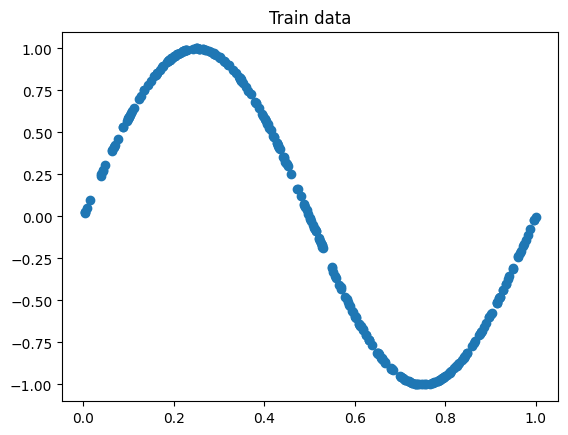

In [74]:
# Affichage

plt.scatter(x_train,y_train)
plt.title("Train data")


Text(0.5, 1.0, 'Val data')

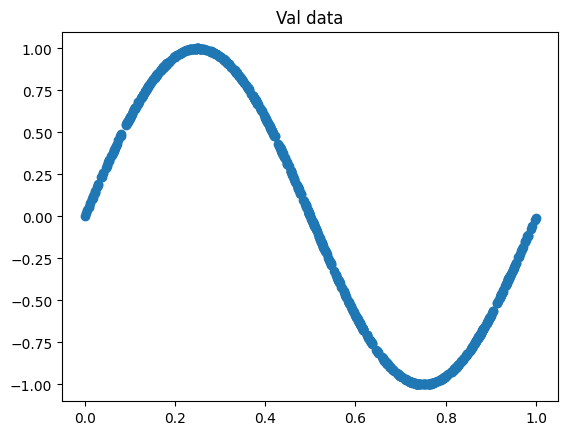

In [75]:
# Affichage

plt.scatter(x_val,y_val)
plt.title("Val data")

# Modèle

In [76]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, out_dim):
        """
        Args
        input_size : Taille d'entrée
        hidden_size : dimension couches cachées
        out_dim : dimension de sortie

        """
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, hidden_size)  
        self.fc3 = nn.Linear(hidden_size, out_dim) 

    
    def forward(self, x):
        
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

    
    # Fully connected neural network with one hidden layer
class SequentialNeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, out_dim):
        """
        Args
        input_size : Taille d'entrée
        hidden_size : dimension couches cachées
        out_dim : dimension de sortie

        """
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential(nn.Linear(input_size, hidden_size),
                                  nn.Sigmoid(),
                                  nn.Linear(hidden_size,hidden_size),
                                  nn.Sigmoid(),
                                  nn.Linear(hidden_size,out_dim))
 
    
    def forward(self, x):
        out = self.model(x)
        return out
    


In [10]:
input_size = 1
hidden_size = 32
num_classes = 1
model = NeuralNet(input_size, hidden_size, num_classes).to(device)


In [11]:
#Model parameters

for name, param in model.named_parameters():
    print(name , param, param.requires_grad, "\n"+"----------------------------------"*2)

fc1.weight Parameter containing:
tensor([[-0.9080],
        [ 0.2871],
        [ 0.5900],
        [ 0.6471],
        [ 0.9426],
        [ 0.8110],
        [-0.6060],
        [ 0.4383],
        [-0.7902],
        [-0.5375],
        [ 0.8321],
        [ 0.5066],
        [-0.8761],
        [-0.6957],
        [ 0.0336],
        [-0.2256],
        [ 0.1646],
        [ 0.8814],
        [ 0.6132],
        [ 0.7560],
        [ 0.3020],
        [ 0.1717],
        [ 0.9482],
        [ 0.8473],
        [ 0.7059],
        [-0.8517],
        [-0.1698],
        [-0.0973],
        [-0.5063],
        [-0.0362],
        [-0.2561],
        [ 0.1504]], device='cuda:0', requires_grad=True) True 
--------------------------------------------------------------------
fc1.bias Parameter containing:
tensor([-0.6098,  0.6260, -0.7502,  0.2138,  0.9716,  0.2937, -0.8290,  0.5410,
        -0.0113, -0.0242, -0.7834, -0.6930,  0.4351, -0.6046, -0.4494, -0.3542,
        -0.0964,  0.4648, -0.9208, -0.0144, -0.6459,  0

# Fonction de cout

In [12]:
# Loss and optimizer
criterion = nn.MSELoss()

# Optimiseur

In [13]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Entrainement du modèle

In [14]:
# Train the model
batch_size = 10
num_epochs = 500
N_train = x_train.shape[0]
batch_per_epoch = N_train//batch_size
batch_per_epoch = batch_per_epoch +1 if N_train%batch_per_epoch != 0 else batch_per_epoch

x_train = torch.tensor(x_train,dtype=torch.float32).reshape(-1,1)
y_train = torch.tensor(y_train,dtype=torch.float32).reshape(-1,1)

model.train()

for epoch in range(num_epochs):
    avg_loss = 0.0
    for i in range(batch_per_epoch):  
        # Move tensors to the configured device
        start= i*batch_size
        end = min(N_train, (i+1)*batch_size)
        x_train_batch =x_train[start:end].to(device)
        y_train_batch =y_train[start:end].to(device)

        
        # Forward pass
        y_batch_pred = model(x_train_batch)
        loss = criterion(y_batch_pred, y_train_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss +=loss
        
    avg_loss/=batch_per_epoch
        
        #if (i+1) % 100 == 0:
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
           .format(epoch+1, num_epochs, i+1, batch_per_epoch, avg_loss.item()))

Epoch [1/500], Step [3/3], Loss: 0.6265
Epoch [2/500], Step [3/3], Loss: 0.6239
Epoch [3/500], Step [3/3], Loss: 0.6219
Epoch [4/500], Step [3/3], Loss: 0.6200
Epoch [5/500], Step [3/3], Loss: 0.6181
Epoch [6/500], Step [3/3], Loss: 0.6163
Epoch [7/500], Step [3/3], Loss: 0.6144
Epoch [8/500], Step [3/3], Loss: 0.6125
Epoch [9/500], Step [3/3], Loss: 0.6106
Epoch [10/500], Step [3/3], Loss: 0.6087
Epoch [11/500], Step [3/3], Loss: 0.6067
Epoch [12/500], Step [3/3], Loss: 0.6047
Epoch [13/500], Step [3/3], Loss: 0.6027
Epoch [14/500], Step [3/3], Loss: 0.6007
Epoch [15/500], Step [3/3], Loss: 0.5986
Epoch [16/500], Step [3/3], Loss: 0.5965
Epoch [17/500], Step [3/3], Loss: 0.5943
Epoch [18/500], Step [3/3], Loss: 0.5921
Epoch [19/500], Step [3/3], Loss: 0.5898
Epoch [20/500], Step [3/3], Loss: 0.5875
Epoch [21/500], Step [3/3], Loss: 0.5851
Epoch [22/500], Step [3/3], Loss: 0.5827
Epoch [23/500], Step [3/3], Loss: 0.5801
Epoch [24/500], Step [3/3], Loss: 0.5776
Epoch [25/500], Step [3/3

Epoch [225/500], Step [3/3], Loss: 0.0976
Epoch [226/500], Step [3/3], Loss: 0.0975
Epoch [227/500], Step [3/3], Loss: 0.0975
Epoch [228/500], Step [3/3], Loss: 0.0975
Epoch [229/500], Step [3/3], Loss: 0.0975
Epoch [230/500], Step [3/3], Loss: 0.0975
Epoch [231/500], Step [3/3], Loss: 0.0975
Epoch [232/500], Step [3/3], Loss: 0.0975
Epoch [233/500], Step [3/3], Loss: 0.0975
Epoch [234/500], Step [3/3], Loss: 0.0975
Epoch [235/500], Step [3/3], Loss: 0.0975
Epoch [236/500], Step [3/3], Loss: 0.0975
Epoch [237/500], Step [3/3], Loss: 0.0975
Epoch [238/500], Step [3/3], Loss: 0.0975
Epoch [239/500], Step [3/3], Loss: 0.0974
Epoch [240/500], Step [3/3], Loss: 0.0974
Epoch [241/500], Step [3/3], Loss: 0.0974
Epoch [242/500], Step [3/3], Loss: 0.0974
Epoch [243/500], Step [3/3], Loss: 0.0974
Epoch [244/500], Step [3/3], Loss: 0.0974
Epoch [245/500], Step [3/3], Loss: 0.0974
Epoch [246/500], Step [3/3], Loss: 0.0974
Epoch [247/500], Step [3/3], Loss: 0.0974
Epoch [248/500], Step [3/3], Loss:

Epoch [477/500], Step [3/3], Loss: 0.0960
Epoch [478/500], Step [3/3], Loss: 0.0960
Epoch [479/500], Step [3/3], Loss: 0.0960
Epoch [480/500], Step [3/3], Loss: 0.0960
Epoch [481/500], Step [3/3], Loss: 0.0960
Epoch [482/500], Step [3/3], Loss: 0.0960
Epoch [483/500], Step [3/3], Loss: 0.0960
Epoch [484/500], Step [3/3], Loss: 0.0960
Epoch [485/500], Step [3/3], Loss: 0.0959
Epoch [486/500], Step [3/3], Loss: 0.0959
Epoch [487/500], Step [3/3], Loss: 0.0959
Epoch [488/500], Step [3/3], Loss: 0.0959
Epoch [489/500], Step [3/3], Loss: 0.0959
Epoch [490/500], Step [3/3], Loss: 0.0959
Epoch [491/500], Step [3/3], Loss: 0.0959
Epoch [492/500], Step [3/3], Loss: 0.0959
Epoch [493/500], Step [3/3], Loss: 0.0959
Epoch [494/500], Step [3/3], Loss: 0.0959
Epoch [495/500], Step [3/3], Loss: 0.0959
Epoch [496/500], Step [3/3], Loss: 0.0959
Epoch [497/500], Step [3/3], Loss: 0.0959
Epoch [498/500], Step [3/3], Loss: 0.0959
Epoch [499/500], Step [3/3], Loss: 0.0959
Epoch [500/500], Step [3/3], Loss:

# Predict

Text(0.5, 1.0, 'Prediction vs Exact data')

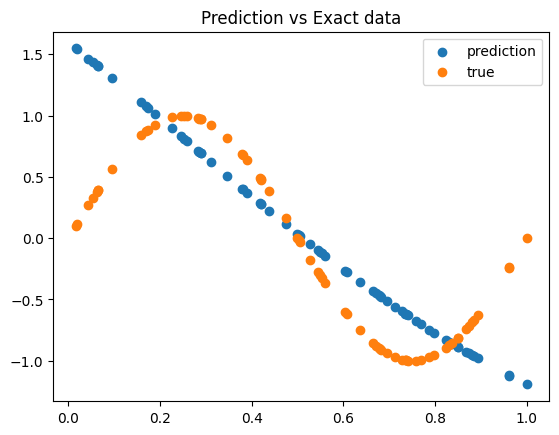

In [15]:
x_val = torch.tensor(x_val,dtype=torch.float32).reshape(-1,1)


model.eval()
with torch.no_grad():
    y_val_pred = model(x_val.to(device))
# Affichage
y_val_pred = y_val_pred.detach().cpu().numpy()
plt.scatter(x_val,y_val_pred,label = "prediction")
plt.scatter(x_val,y_val, label ="true")
plt.legend()
plt.title("Prediction vs Exact data")

# Save the model

In [16]:
path = "./mymodel.pt"

#Sauvegardez toujours votre modèle sur CPU !
model.eval()
model = model.cpu()
state_dict= model.state_dict()
# Save just the state dict
torch.save(state_dict, path)


#Save the model as a pickle object
path = "./mymodel.pkl"
torch.save(model, path)


# Load the model

In [17]:
# Load just the state dict

input_size = 1
hidden_size = 32
num_classes = 1
path = "./mymodel.pt"
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
loaded_state_dict = torch.load(path, weights_only=True)
model.load_state_dict(loaded_state_dict)
model.eval()
#Load the pickle object

# Model class must be defined somewhere
path = "./mymodel.pkl"
model = torch.load(path, weights_only=False)
model.eval()

NeuralNet(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (activation): Sigmoid()
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

Le processus de sauvegarde/chargement utilise la syntaxe la plus intuitive et implique le moins de code possible. Enregistrer un modèle de cette manière sauve le module entier en utilisant le module pickle de Python. L'inconvénient de cette approche est que les données sérialisées sont liées aux classes spécifiques et à la structure exacte du répertoire utilisée lors de l'enregistrement du modèle. Cela est dû au fait que pickle n'enregistre pas la classe du modèle elle-même. Au lieu de cela, il enregistre un chemin vers le fichier contenant la classe, qui est utilisé lors du chargement. Pour cette raison, votre code peut rencontrer des problèmes dans divers cas d'utilisation, comme dans d'autres projets ou après des refactorisations.   

Une convention courante dans PyTorch consiste à enregistrer les modèles avec l'extension .pt ou .pth.

N'oubliez pas d'appeler model.eval() pour définir les couches de dropout et de normalisation par lots en mode évaluation avant d'exécuter l'inférence. Ne pas le faire entraînera des résultats d'inférence incohérents.



# Créer un module custom

## Batch Normalisation



Ecrire le module de batch normalisation 1d .
$$y= \beta + \frac{x-E(x)}{\sqrt{Var(x)+\epsilon}} * \gamma$$


Calculer E(x) et Var(x) avec un momentum :

E(x) = momentum * E(x) + (1 - momentum) * batch_mean
Prendre $\epsilon$ = 1e-5 , momentum = 0.9.

Distinguer la phase d'apprentissage et de test. En phase d'inférence , les moyennes sont figées

In [18]:

class BatchNorm1d(nn.Module):
    def __init__(self, num_features):
        super(BatchNorm1d, self).__init__()
        self.num_features = num_features
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)
        self.training = True  # Training mode

    def forward(self, x):
        if self.training:
            # Calculate batch mean and variance
            batch_mean = x.mean(dim=0)
            batch_var = x.var(dim=0, unbiased=False)

            # Update running statistics (moving average)
            momentum = 0.9  # Adjust momentum as needed
            self.running_mean = momentum * self.running_mean + (1 - momentum) * batch_mean
            self.running_var = momentum * self.running_var + (1 - momentum) * batch_var

            # Normalize input
            x = (x - batch_mean) / torch.sqrt(batch_var + 1e-5)
        else:
            # Use running statistics during evaluation
            x = (x - self.running_mean) / torch.sqrt(self.running_var + 1e-5)

        # Apply affine transformation
        x = self.gamma * x + self.beta

        return x

In [19]:
# Create a batch normalization layer
bn_layer = BatchNorm1d(num_features=10)

# Input tensor
x = torch.randn(4, 10)  # Batch size 32, 10 features

#torch batch normalisation

torch_bn_layer = nn.BatchNorm1d(num_features=10)
# Apply batch normalization
output = bn_layer(x)
output_torch = torch_bn_layer(x)

print(torch.allclose(output,output_torch))

True


## Resnet Block 

![ResNet Block](https://d2l.ai/_images/residual-block.svg)

In [20]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU(inplace=True)

        # Shortcut connection
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        residual = x

        # Residual block
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)

        # Add residual connection
        x += self.shortcut(residual)
        x = self.relu2(x)

        return x

# Exercice : Faire un modèle qui est une combinaison linéaire de 2 autres modèles

# Chargement de données efficaces
# Que se passe il si mon dataset est plus grand que ma RAM ?

## Dataloader and dataset


In [77]:
class SineDataset(torch.utils.data.Dataset):
    def __init__(self, N,seed = 2024, percentage_of_training_data = 0.3,train_mode = True):
        self.N = N
        np.random.seed(seed)

        x= np.random.rand(N)
        y = np.sin(2*np.pi*x)
        dataset_indexes = np.arange(N)

        train_indexes = np.random.choice(np.arange(N),size = int(percentage_of_training_data*N), replace = False)

        val_indexes = list(set(dataset_indexes).difference(set(train_indexes)))

        self.x_train= x[train_indexes]
        self.y_train = y[train_indexes]
        self.x_val = x[val_indexes]
        self.y_val=y[val_indexes]
        
        self.N_train = self.x_train.shape[0]
        self.N_val = self.x_val.shape[0]
        
        self.is_train = train_mode


    def __len__(self):
        
        
        return self.N_train if self.is_train else self.N_val

    def __getitem__(self, idx):
        if self.is_train:
            
            x = torch.tensor(self.x_train[idx],dtype=torch.float32).reshape(1)
            y = torch.tensor(self.y_train[idx],dtype=torch.float32).reshape(1)
        else:
            x = torch.tensor(self.x_val[idx],dtype=torch.float32).reshape(1)
            y = torch.tensor(self.y_val[idx],dtype=torch.float32).reshape(1)
            
        return x,y
    



    


In [78]:
dataset=SineDataset(N = 10**3,seed = 2024,percentage_of_training_data = 0.3,train_mode = True)

dataloader = torch.utils.data.DataLoader(dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True,num_workers=1)

In [79]:
input_size = 1
hidden_size = 32
num_classes = 1
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [81]:
# Train the model
batch_size = 10
num_epochs = 500

model =model.to(device)
model.train()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
for epoch in range(num_epochs):
    avg_loss = 0.0
    for i,(x_train_batch,y_train_batch) in enumerate(dataloader):  

        x_train_batch =x_train_batch.to(device)
        y_train_batch =y_train_batch.to(device)

        
        # Forward pass
        y_batch_pred = model(x_train_batch)
        loss = criterion(y_batch_pred, y_train_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss +=loss
        
    avg_loss/=i
        
        #if (i+1) % 100 == 0:
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
           .format(epoch+1, num_epochs, i+1, batch_per_epoch, avg_loss.item()))

Epoch [1/500], Step [30/3], Loss: 0.1129
Epoch [2/500], Step [30/3], Loss: 0.1119
Epoch [3/500], Step [30/3], Loss: 0.1103
Epoch [4/500], Step [30/3], Loss: 0.1100
Epoch [5/500], Step [30/3], Loss: 0.1096
Epoch [6/500], Step [30/3], Loss: 0.1072
Epoch [7/500], Step [30/3], Loss: 0.1090
Epoch [8/500], Step [30/3], Loss: 0.1068
Epoch [9/500], Step [30/3], Loss: 0.1030
Epoch [10/500], Step [30/3], Loss: 0.1013
Epoch [11/500], Step [30/3], Loss: 0.1032
Epoch [12/500], Step [30/3], Loss: 0.0984
Epoch [13/500], Step [30/3], Loss: 0.0975
Epoch [14/500], Step [30/3], Loss: 0.0969
Epoch [15/500], Step [30/3], Loss: 0.0956
Epoch [16/500], Step [30/3], Loss: 0.0928
Epoch [17/500], Step [30/3], Loss: 0.0916
Epoch [18/500], Step [30/3], Loss: 0.0905
Epoch [19/500], Step [30/3], Loss: 0.0893
Epoch [20/500], Step [30/3], Loss: 0.0881
Epoch [21/500], Step [30/3], Loss: 0.0864
Epoch [22/500], Step [30/3], Loss: 0.0857
Epoch [23/500], Step [30/3], Loss: 0.0857
Epoch [24/500], Step [30/3], Loss: 0.0824
E

Epoch [195/500], Step [30/3], Loss: 0.0013
Epoch [196/500], Step [30/3], Loss: 0.0013
Epoch [197/500], Step [30/3], Loss: 0.0013
Epoch [198/500], Step [30/3], Loss: 0.0014
Epoch [199/500], Step [30/3], Loss: 0.0012
Epoch [200/500], Step [30/3], Loss: 0.0014
Epoch [201/500], Step [30/3], Loss: 0.0013
Epoch [202/500], Step [30/3], Loss: 0.0011
Epoch [203/500], Step [30/3], Loss: 0.0012
Epoch [204/500], Step [30/3], Loss: 0.0011
Epoch [205/500], Step [30/3], Loss: 0.0010
Epoch [206/500], Step [30/3], Loss: 0.0010
Epoch [207/500], Step [30/3], Loss: 0.0010
Epoch [208/500], Step [30/3], Loss: 0.0010
Epoch [209/500], Step [30/3], Loss: 0.0011
Epoch [210/500], Step [30/3], Loss: 0.0011
Epoch [211/500], Step [30/3], Loss: 0.0010
Epoch [212/500], Step [30/3], Loss: 0.0010
Epoch [213/500], Step [30/3], Loss: 0.0009
Epoch [214/500], Step [30/3], Loss: 0.0010
Epoch [215/500], Step [30/3], Loss: 0.0008
Epoch [216/500], Step [30/3], Loss: 0.0009
Epoch [217/500], Step [30/3], Loss: 0.0008
Epoch [218/

Epoch [386/500], Step [30/3], Loss: 0.0001
Epoch [387/500], Step [30/3], Loss: 0.0001
Epoch [388/500], Step [30/3], Loss: 0.0001
Epoch [389/500], Step [30/3], Loss: 0.0001
Epoch [390/500], Step [30/3], Loss: 0.0001
Epoch [391/500], Step [30/3], Loss: 0.0001
Epoch [392/500], Step [30/3], Loss: 0.0001
Epoch [393/500], Step [30/3], Loss: 0.0001
Epoch [394/500], Step [30/3], Loss: 0.0001
Epoch [395/500], Step [30/3], Loss: 0.0001
Epoch [396/500], Step [30/3], Loss: 0.0001
Epoch [397/500], Step [30/3], Loss: 0.0001
Epoch [398/500], Step [30/3], Loss: 0.0002
Epoch [399/500], Step [30/3], Loss: 0.0001
Epoch [400/500], Step [30/3], Loss: 0.0001
Epoch [401/500], Step [30/3], Loss: 0.0001
Epoch [402/500], Step [30/3], Loss: 0.0001
Epoch [403/500], Step [30/3], Loss: 0.0001
Epoch [404/500], Step [30/3], Loss: 0.0001
Epoch [405/500], Step [30/3], Loss: 0.0001
Epoch [406/500], Step [30/3], Loss: 0.0001
Epoch [407/500], Step [30/3], Loss: 0.0001
Epoch [408/500], Step [30/3], Loss: 0.0001
Epoch [409/

Text(0.5, 1.0, 'Prediction vs Exact data')

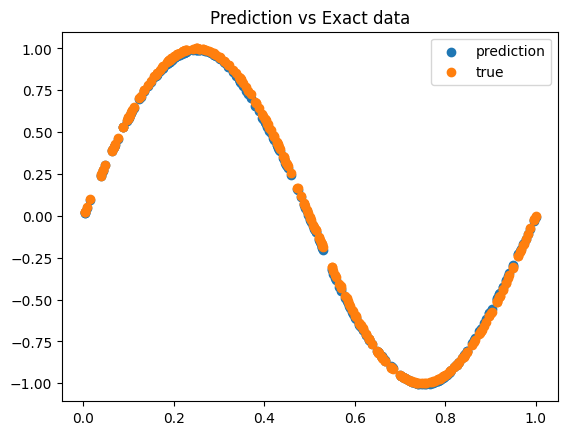

In [82]:
dataset.is_train = True
model.eval()
x_val, y_val_true , y_val_pred = [], [],[]

with torch.no_grad():


    for i,(x_val_batch,y_val_batch) in enumerate(dataloader): 
        x_val_batch =x_val_batch.to(device)
        y_val_batch =y_val_batch.to(device)
        # Forward pass
        y_val_pred_batch = model(x_val_batch)


        x_val += x_val_batch.detach().cpu().numpy().tolist()
        y_val_true += y_val_batch.detach().cpu().numpy().tolist()
        y_val_pred += y_val_pred_batch.detach().cpu().numpy().tolist()



# Affichage

plt.scatter(x_val,y_val_pred,label = "prediction")
plt.scatter(x_val,y_val_true, label ="true")
plt.legend()
plt.title("Prediction vs Exact data")

In [ ]:
import torchvision
from torchvision import transforms
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 




# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
mnist_train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

mnist_test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)



# Afficher quelque images aléatoirement du contenu du dataset  MNIST

torch.Size([10, 1, 28, 28])


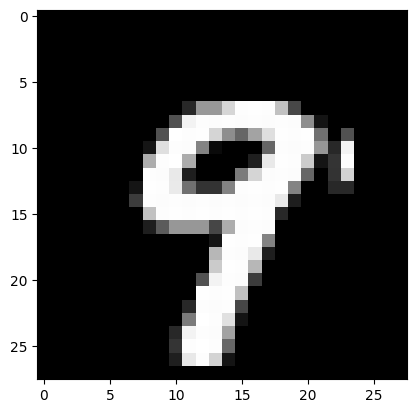

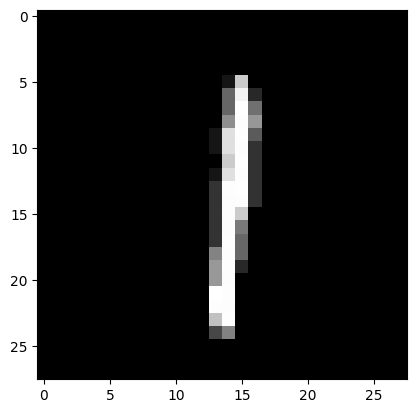

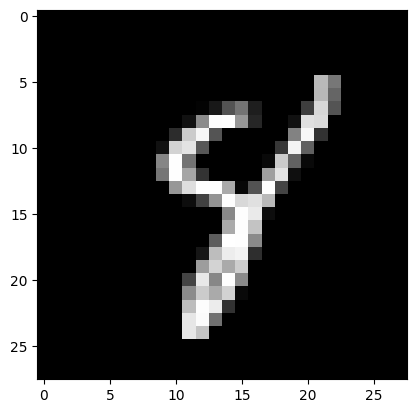

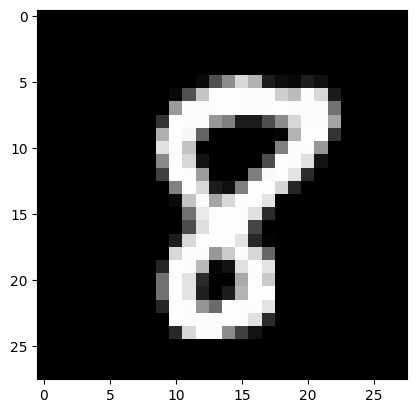

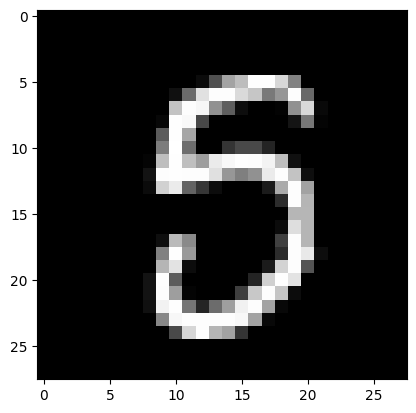

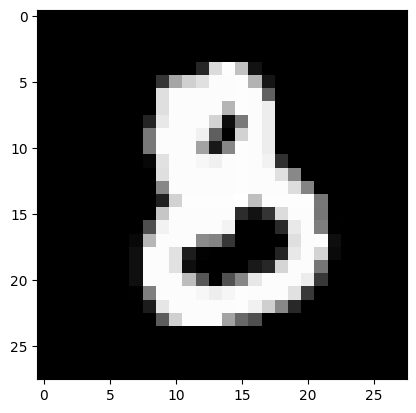

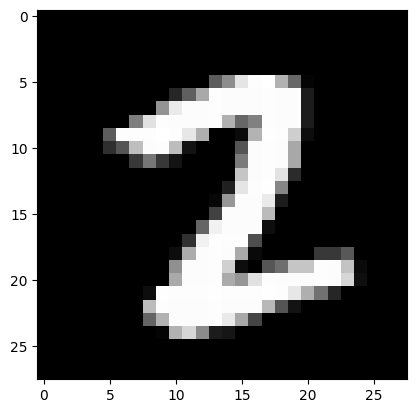

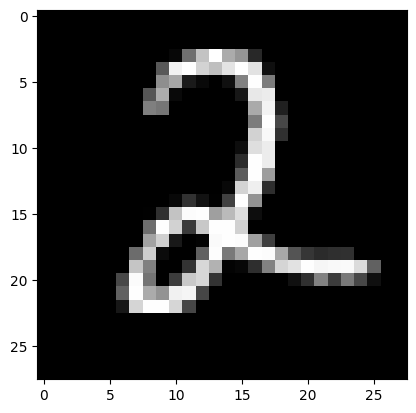

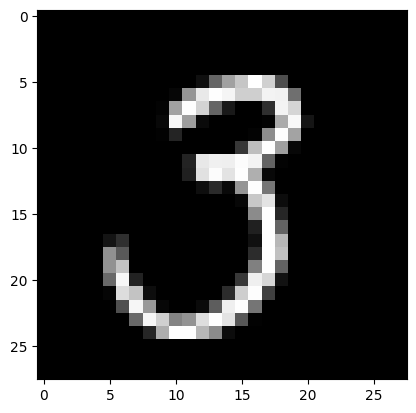

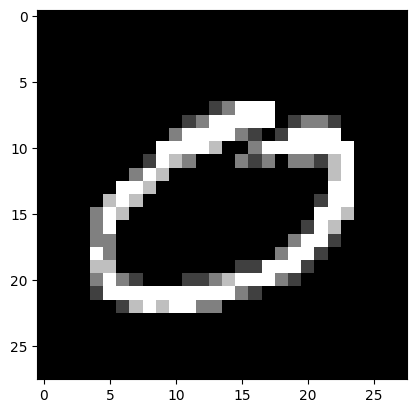

In [102]:
with torch.no_grad():


    for i,(x,y) in enumerate(mnist_train_loader): 
        print(x.shape)
        break

for i in range(batch_size):
    x_= x[i].squeeze()
    plt.imshow(x_,cmap="gray")
    plt.show()

# Exercice :  Charger le dataset suivant dans pytorch et afficher des images de chaque classe: 
https://drive.google.com/file/d/1V_zyw7kZ1YnPYM4VzCtP9agY7PiFuH-P/view?usp=sharing